In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

#### <h1 style="text-align:center">Semana 3. Clase 4: Señales y sistemas en tiempo discreto </h1>
<h3 style="text-align:center">ACUS340: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Variable independiente en la representación matemática de una señal.

* Las señales son representadas matemáticamente como una **función**. Estas pueden ser funciones de **una variable independiente**, o **más de una variable independiente**.

$$
\begin{align}
f_{1}(t) &= t^{2}\\
f_{2}(x,y) &= x^{2}+2xy+x^{2}
\end{align}
$$




### Señal de audio 1D

In [27]:
import pyaudio
import wave

chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "mipropiavoz.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


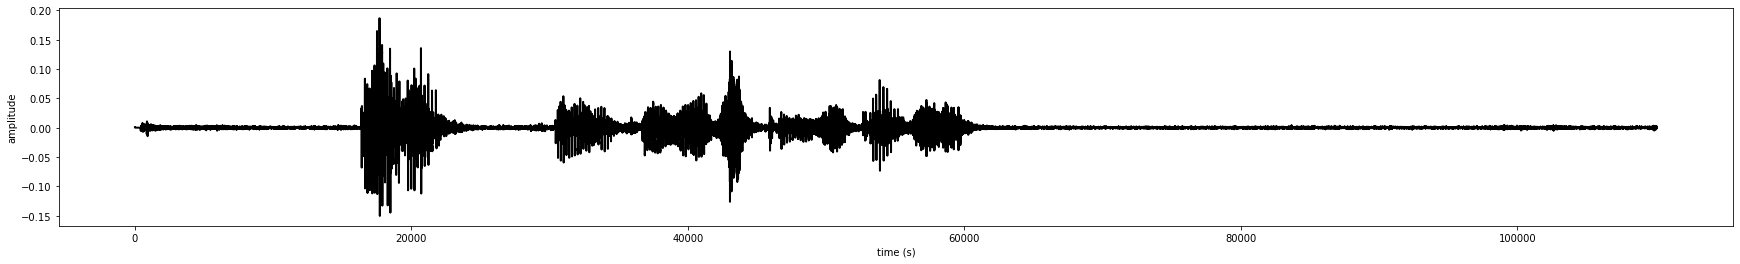

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display

from mpl_toolkits.mplot3d import Axes3D

x, sr = librosa.load('mipropiavoz.wav')
plt.figure(figsize=(30, 4))

baseline = plt.plot(x) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio('mipropiavoz.wav')


### Uso sox: https://digitalcardboard.com/blog/2009/08/25/the-sox-of-silence/

+ Si queremos cortar los silencios existentes al inicio y término de una señal, entonces podemos usar SOX. Abrir un terminal en la carpeta donde está nuestro archivo de audio. Y correr las dos siguientes líneas:

> * sox in.wav temp.wav silence 1 0.1 1% reverse
> * sox temp.wav out.wav silence 1 0.1 1% reverse




In [22]:
xt, sr = librosa.load('mipropiavozt.wav')


ipd.Audio('mivozt.wav')


35438


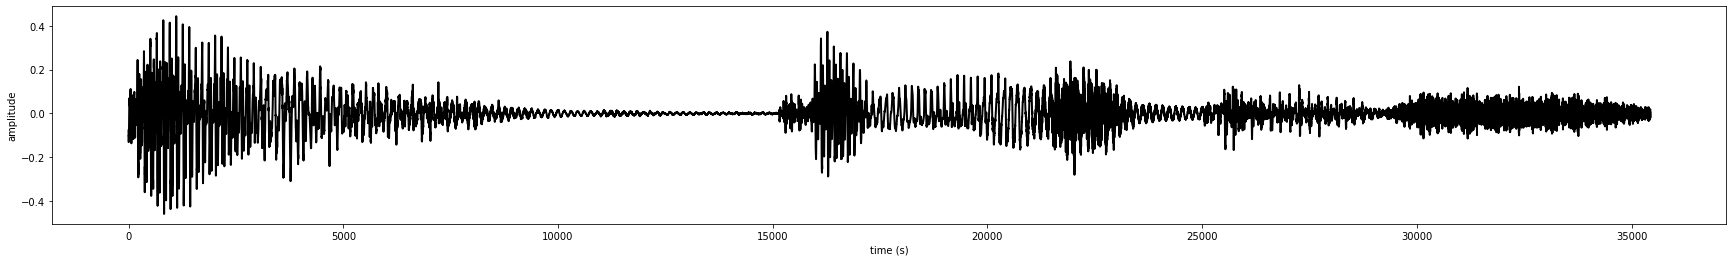

In [9]:
plt.figure(figsize=(30, 4))
baseline = plt.plot(xt) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio('mivozt.wav')
Lxt = len(xt)
print(Lxt)

35438


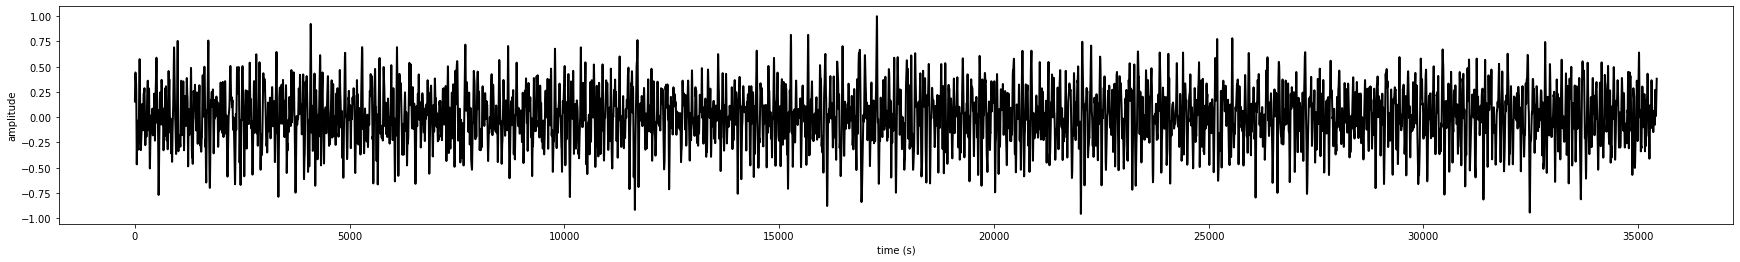

In [25]:
from scipy.io.wavfile import write

noise, sr = librosa.load('noisereference.wav')

noiset    = noise[0:35438]

plt.figure(figsize=(30, 4))
baseline = plt.plot(noiset) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio('noisereference.wav')
Lnoiset = len(noiset)
print(Lnoiset)


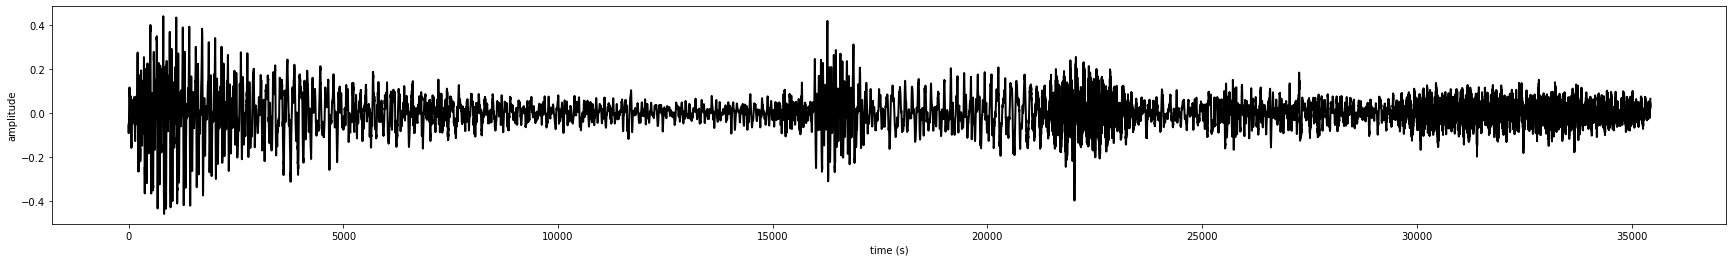

In [14]:
nombre_archivo_salida  = "mivozmasruido.wav"

y = xt + 0.125*noiset
write(nombre_archivo_salida, sr, y)

plt.figure(figsize=(30, 4))
baseline = plt.plot(y) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio(nombre_archivo_salida)


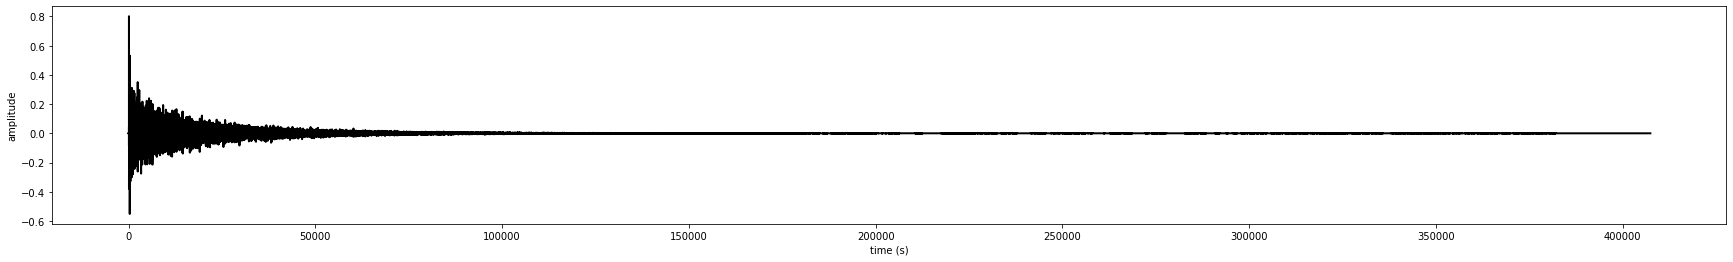

In [15]:
rev, sr = librosa.load('ImpS1Amp.wav')

plt.figure(figsize=(30, 4))
baseline = plt.plot(rev) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio('ImpS1Amp.wav')

35438


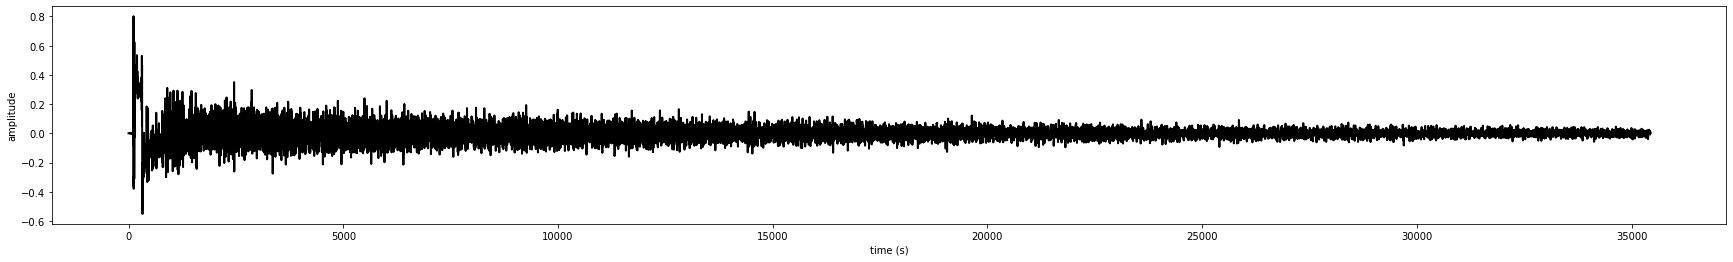

In [24]:
nombre_archivo_salidar  = "mivozmasrev.wav"
revt    = rev[0:35438]

plt.figure(figsize=(30, 4))
baseline = plt.plot(revt) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

print(len(revt))


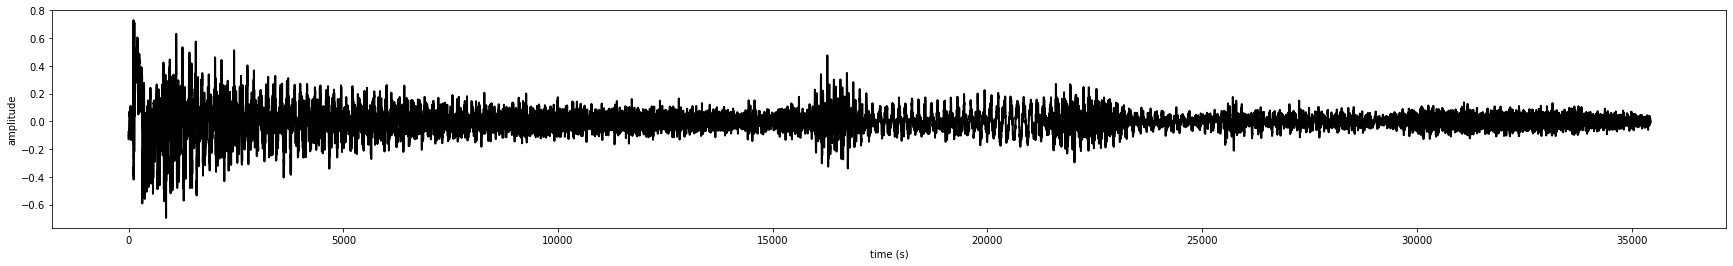

In [26]:
nombre_archivo_salida_rev  = "mivozmasrev.wav"

yrev = xt + revt
write(nombre_archivo_salida_rev, sr, y)

plt.figure(figsize=(30, 4))
baseline = plt.plot(yrev) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio(nombre_archivo_salida_rev)

### Meshgrid 2D

[-3.  0.  3.]
[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]]
[-3. -1.  1.  3.]
[[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]]
[(-3.0, -3.0), (0.0, -3.0), (3.0, -3.0)] [(-3.0, -1.0), (0.0, -1.0), (3.0, -1.0)] [(-3.0, 1.0), (0.0, 1.0), (3.0, 1.0)] [(-3.0, 3.0), (0.0, 3.0), (3.0, 3.0)]


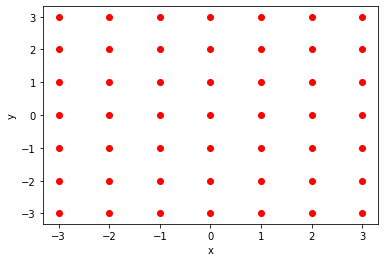

In [66]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

xlist = np.linspace(-3.0,3.0,3)
ylist = np.linspace(-3.0,3.0,4)

X, Y  = np.meshgrid(xlist,ylist)

print(xlist)
print(X)

print(ylist)
print(Y)

print([(xlist[0],ylist[0]),(xlist[1],ylist[0]),(xlist[2],ylist[0])],\
      [(xlist[0],ylist[1]),(xlist[1],ylist[1]),(xlist[2],ylist[1])],\
      [(xlist[0],ylist[2]),(xlist[1],ylist[2]),(xlist[2],ylist[2])],\
      [(xlist[0],ylist[3]),(xlist[1],ylist[3]),(xlist[2],ylist[3])]) # par de coordenadas
#print((xlist[0],ylist[0])) # pares de coordenadas

n,m   = 7,7

start = -3

x_vals = np.arange(start,start+n,1)
y_vals = np.arange(start,start+n,1)

X,Y    = np.meshgrid(x_vals,y_vals)

fig,ax = plt.subplots()
ax.scatter(X,Y,color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

* Es común en procesamiento de señales referirse a la variable independiente en la representación matemática de una señal como el **tiempo**. 
* La variable tiempo puede ser **continua** o **discreta**.
* Las señales de **tiempo continuo** se definen a lo largo de un continuo de tiempo y son representadas por una variable **independiente continua**.
* Las señales de tiempo continuo son llamadas como **señales análogas**.

+ Las señales de **tiempo discreto** son definidas en **tiempos discretos**. Por lo que la variable independiente toma **valores discretos**. Así, las señales de tiempo discreto son representadas como **secuencias de números**.

+ Además de ser la variable independiente, ya sea continua o discreta, la **amplitud** de la señal puede ser **continua** o **discreta**.

+ Las señales para las cuales **tanto el tiempo como la amplitud son discretos** son llamadas **señales digitales**.

### Sistemas de procesamiento de señales.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="Sistema2.png" width="300" height="300" alt="Tiny"></a>
    <strong>Figure 1. Una representación idealizada de un sistema de procesamiento de señal.</strong>


+ Los sistemas de procesamiento de señales pueden clasificarse a lo largo de las mismas líneas que las señales. 
+ Los **sistemas de tiempo continuo** son aquellos sistemas para los que tanto la **entrada** como la **salida** son señales de tiempo continuo.
+ Los **sistemas de tiempo discreto** son aquellos para los que tanto la entrada como la salida son señales de tiempo discreto. 
+ Del mismo modo, un sistema digital es un sistema para el cual tanto la entrada como la salida son señales digitales. 
+ Procesamiento de señal digital, entonces, trata el problema de transformar señales que son discretas tanto en amplitud como en tiempo.    

### Señal impulso unitario de Dirac.

Esta señal denotada como $\delta[n]$ no es una función en el sentido convencional. Esta se define como:

\begin{align}
\delta[n] &= \begin{cases}
1 & \text{for } n = 0 \\
0 & \text{otherwise}
\end{cases}
\end{align}

Esta función es también conocida como [*delta de Kronecker*](https://en.wikipedia.org/wiki/Kronecker_delta). La señal es un **impulso unitario**. Sus propiedades más importantes son:

1. **Sifting**

    \begin{align}
    \sum_{k=-\infty}^{\infty}&= x[k] \cdot \delta[n - k] = x[n] 
    \end{align}
    
    Esta importante propiedad implica: $\sum_{k = -\infty}^{\infty} x[k] = 1$.
    
2. **Linealidad**
    \begin{align}
    a \cdot \delta[n] + b \cdot \delta[n] = (a+b) \cdot \delta[n]
    \end{align}

Esta secuencia impulso unitario de Dirac tiene relevancia tanto en análisis de señales como también en el estudio de sistemas. Se usa fundamentalmente en el análisis de sistemas discretos **lineales** e **invariantes en el tiempo**, a través de las **respuestas impulso** de aquellos sistemas.

[0 0 0 0 0 0 0 0 0 0]


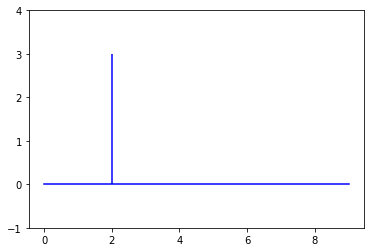

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(10);

x = np.zeros_like(n)
print(x[:])

x[2]=3;

plt.vlines(n,0,x,'b');

plt.ylim(-1,4);

plt.plot(n,0*n, 'b');

plt.show();



In [21]:
help(np.zeros_like)

Help on function zeros_like in module numpy:

zeros_like(a, dtype=None, order='K', subok=True, shape=None)
    Return an array of zeros with the same shape and type as a given array.
    
    Parameters
    ----------
    a : array_like
        The shape and data-type of `a` define these same attributes of
        the returned array.
    dtype : data-type, optional
        Overrides the data type of the result.
    
        .. versionadded:: 1.6.0
    order : {'C', 'F', 'A', or 'K'}, optional
        Overrides the memory layout of the result. 'C' means C-order,
        'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
        'C' otherwise. 'K' means match the layout of `a` as closely
        as possible.
    
        .. versionadded:: 1.6.0
    subok : bool, optional.
        If True, then the newly created array will use the sub-class
        type of 'a', otherwise it will be a base-class array. Defaults
        to True.
    shape : int or sequence of ints, optional.
   